In [1]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
JSON_DATA_PATH = '{}/data/json/'.format(MAIN_PATH)
CSV_DATA_PATH = '{}/data/csv/'.format(MAIN_PATH)

In [2]:
import sys
sys.path.insert(0, MAIN_PATH)

In [3]:
%load_ext autoreload
%autoreload 2
from scripts.models.ltr_nn_tf.train import LTRNNTFTrain
from scripts.models.ltr_nn_tf.metrics import LTRNNTFMetrics

%reload_ext autoreload

# Entrenamiento

In [4]:
ltr_params = {
    'mode': 'tfidf',
    'count_vec_kwargs': {'strip_accents': 'unicode'},
    'target_metric': 'rouge',
    'metric_params': {'rouge_mode': 'rouge-1', 'rouge_metric': 'r'},
    'drop_teams': True,
    'lemma': True,
    'train_perc': 0.7,
    'val_perc': 0.2
}
DENSE_LAYERS = [500, 250, 125, 60, 20]
N_DROPOUT = 4

model_params = {
    'dense_layers': DENSE_LAYERS,
    'dense_activation': ['relu'] * len(DENSE_LAYERS),
    'dropout': [0.3] * N_DROPOUT,
    'optimizer': 'adam'
}
opt_metric = 'mean_squared_error'
epochs = 25
batch_size = 128
# Not in config
shuffle = True
max_queue_size = 50

In [5]:
ltr_train = LTRNNTFTrain(ltr_params, epochs=epochs, batch_size=batch_size,
                         model_params=model_params,
                         opt_metric=opt_metric)

Adding 1 zeros so that params have the same length
Setting target metric to rouge
Setting mode to tfidf
Optimizing mean_squared_error with adam
Epochs: 25
Batch size: 128


In [13]:
ltr_train.pipeline()

Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/98a1222ae6
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               3275500   
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 125)               31375     
_________________________________________________________________
dropout_6 (Dropout)          (None, 125)               0         
______________________________

In [14]:
ltr_train.train()

Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/98a1222ae6
Loading validation data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/98a1222ae6
Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/98a1222ae6
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 500)               3275500   
_________________________________________________________________
dropout_8 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 250)               125250    
_________________________________________________________________
dropout_9 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 125)      

In [8]:
X_train, y_train = ltr_train.train_data()

Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/98a1222ae6


In [8]:
type(y_train)

numpy.ndarray

In [9]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [10]:
X_train.shape

(339040, 6550)

## Métricas

Usando el objeto history de Keras:

In [6]:
history = ltr_train.read_model_info()

In [7]:
history

{'loss': [0.014198931865394115,
  0.013402087613940239,
  0.012987068854272366,
  0.012644752860069275,
  0.01230922807008028,
  0.011959395371377468],
 'mean_squared_error': [0.01413664873689413,
  0.013402087613940239,
  0.012987068854272366,
  0.012644752860069275,
  0.01230922807008028,
  0.011959395371377468],
 'mean_absolute_error': [0.0808044895529747,
  0.07822754979133606,
  0.07682976126670837,
  0.07572734355926514,
  0.07465973496437073,
  0.07358085364103317],
 'val_loss': [0.013972369953989983,
  0.013890126720070839,
  0.013628803193569183,
  0.013712079264223576,
  0.013787268660962582,
  0.013658896088600159],
 'val_mean_squared_error': [0.013972369953989983,
  0.013890126720070839,
  0.013628803193569183,
  0.013712079264223576,
  0.013787268660962582,
  0.013658896088600159],
 'val_mean_absolute_error': [0.08053182065486908,
  0.07976097613573074,
  0.07840773463249207,
  0.0791366919875145,
  0.07904057204723358,
  0.07970905303955078]}

Usando nuestros procesos:

In [6]:
ltr_metrics = LTRNNTFMetrics(ltr_train)

In [8]:
ltr_metrics.run()

Computing metric for train dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/4083eddade/train_metrics.pickle
Computing metric for validation dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/4083eddade/validation_metrics.pickle
Computing metric for test dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/4083eddade/test_metrics.pickle


Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/4083eddade/train_metrics.pickle
mse : 0.011397546059601645
mae : 0.07268008274970815
r2 : 0.38346175748783684


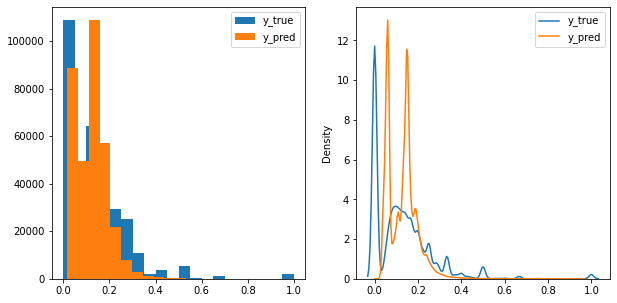

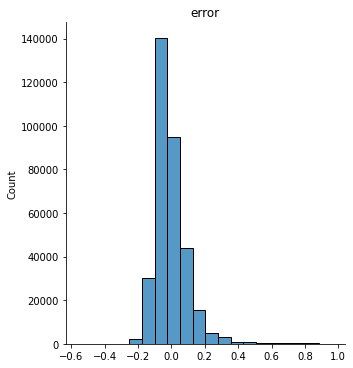

In [9]:
ltr_metrics.show_metrics('train')

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/4083eddade/validation_metrics.pickle
mse : 0.013658895835986135
mae : 0.07970905804988358
r2 : 0.28077460452273706


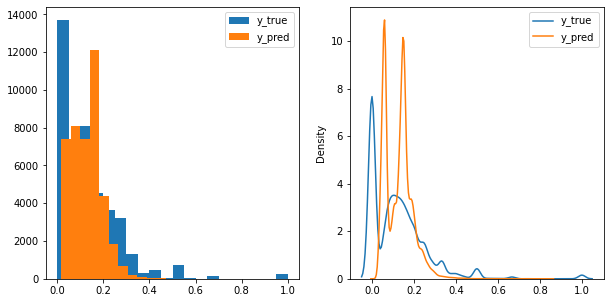

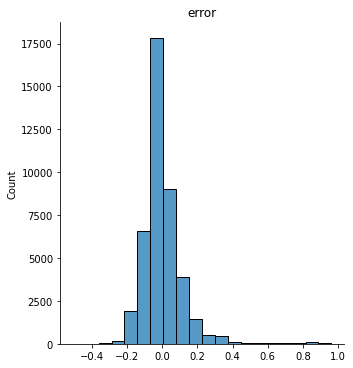

In [10]:
ltr_metrics.show_metrics('validation')

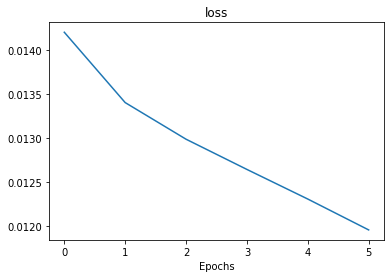

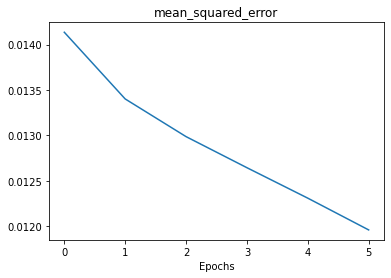

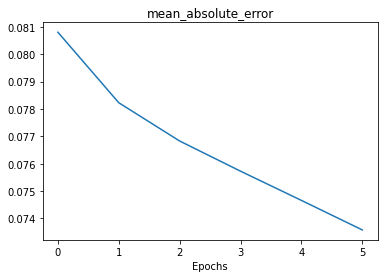

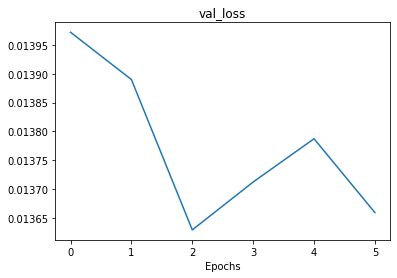

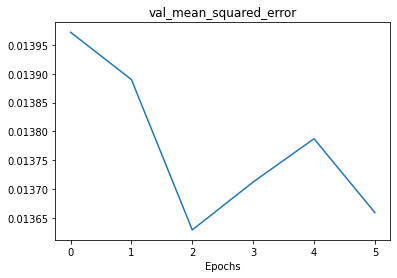

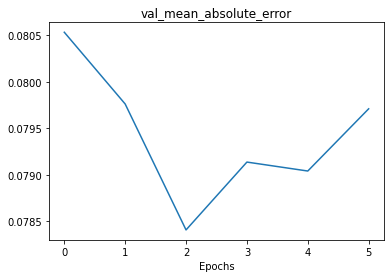

In [11]:
ltr_metrics.show_metrics_history()